In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os 


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
path = "/Users/samalainabayeva/Documents/Omdena/"

In [4]:
df = pd.read_csv(os.path.join(path, '25.csv'))

In [5]:
sample = pd.read_csv(os.path.join(path, "sample_data_edited.csv"), index_col=0)

In [6]:
sample.shape, df.shape

((56289, 28), (31448, 15))

In [7]:
sample.head(3)

,city,state,injury_type,serious_injury,other_injury,age_at_time_of_injury,airbag_deployed,accident_type,truck_bus_involved,truck_involved,taxi_involved,potential_tbi,state_of_injury,catastrophic,called_911,net_attorney_fee,total_bills,total_coverage,positive_mri_finding,life_care_plan_status,ortho_pain_neuro_eval,surgery_completed,surgery_injection_recom,similar_prior_injury,injections_completed,no_treatment_reason,tbi_confirmed,age
0,New Smyrna Beach,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1152.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,65.0
1,Coral Springs,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2499.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39.0
2,Lehigh Acres,FL,Other Injury / Pain,NaN,NaN,NaN,Yes,Multi Car,No,NaN,No,No,NaN,0,Yes,16666.67,30603.62,50000.0,Yes,Yes,Yes,NaN,No,No,NaN,NaN,0,41.0


In [11]:
(sample["total_bills"] > sample["total_coverage"]).sum()

7051

In [12]:
7051 + 19889

26940

<Axes: >

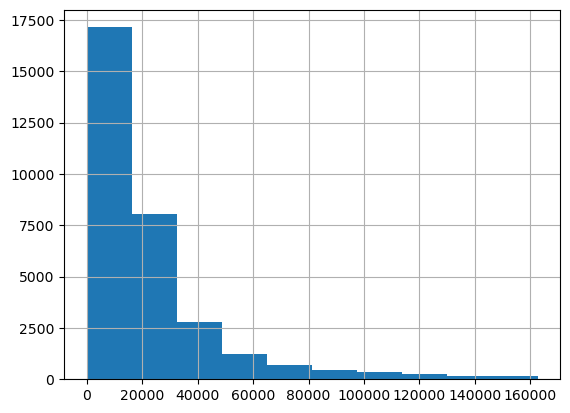

In [23]:
sample[sample["total_bills"] < sample["total_bills"].quantile(.975)]['total_bills'].hist()

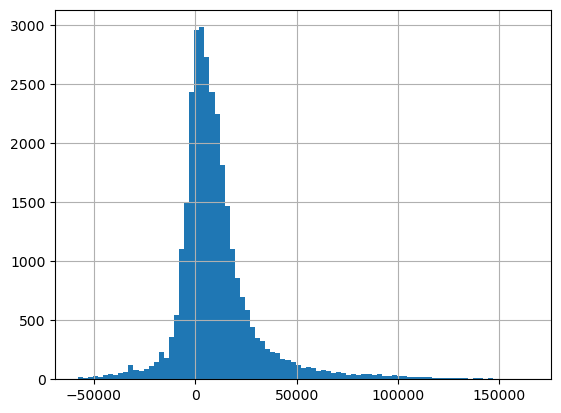

In [30]:
bills_nofliers = sample[sample["total_bills"] < sample["total_bills"].quantile(.975)]['total_bills']
legal_nofliers = sample[sample["total_bills"] < sample["total_bills"].quantile(.975)]['net_attorney_fee']
(bills_nofliers - legal_nofliers).dropna().hist(bins=np.arange(-58000, 165000, 2500));

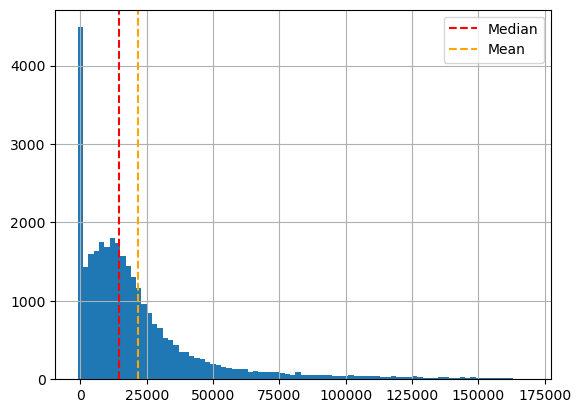

In [43]:
bills_nofliers.hist(bins=np.arange(-1_000, 170_000, 2000))
plt.axvline(bills_nofliers.median(), color="red", linestyle="--", label="Median")
plt.axvline(bills_nofliers.mean(), color = "orange", linestyle="--", label="Mean")
plt.legend();

In [37]:
(bills_nofliers < 0).sum()

0

In [39]:
legal_nofliers.describe()

count    3.123300e+04
mean     1.334782e+04
std      4.472617e+04
min     -1.141620e+04
25%      3.333330e+03
50%      6.666660e+03
75%      1.250000e+04
max      3.791127e+06
Name: net_attorney_fee, dtype: float64

In [42]:
df.head(1)

,Row_Labels,Sum_of_PaidAmount,MemberID,Member_Effective_Date,Gender,Age_at_Time_of_Claim,Incurred_Date,Year,Diag_1,ICD_10_Roll_Up,Diag_2,IFM_PCP,Baseline_Comorbidities,Allowed,IFM_PCP2
0,10018301460,99.86,1155,1/1/2010,F,64,1/5/2010,2010,71946,Diseases of the musculoskeletal system and con...,- None -,Y,3,129.86,Y


In [43]:
df.shape

(31448, 15)

In [44]:
# Making all of the column names lowercase
df.columns = df.columns.str.lower()

In [45]:
# Re-naming with underscores and appropriate column names to match other data where possible 
df.rename(columns={"sum_of_paidamount":"sum_of_paid_amount", 
                   "memberid":"member_id", 
                   "age_at_time_of_claim":"age"}, inplace=True)

In [46]:
# datetimes are formatted %Y-%m-%d and there are WAY more entries for January than any other month

df["member_effective_date"] = pd.to_datetime(df["member_effective_date"])

In [49]:
# Seems to be a huge data dump at the start of this dataset for 2010-01-01, must be investigated
df["member_effective_date"].value_counts()

member_effective_date
2010-01-01    19738
2015-01-01     1236
2016-10-01      784
2012-09-01      755
2015-09-01      638
              ...  
2021-04-01        1
2015-11-01        1
2013-10-01        1
2017-12-01        1
2016-06-01        1
Name: count, Length: 103, dtype: int64

In [50]:
df.head()

,row_labels,sum_of_paid_amount,member_id,member_effective_date,gender,age,incurred_date,year,diag_1,icd_10_roll_up,diag_2,ifm_pcp,baseline_comorbidities,allowed,ifm_pcp2
0,10018301460,99.86,1155,2010-01-01,F,64,1/5/2010,2010,71946,Diseases of the musculoskeletal system and con...,- None -,Y,3,129.86,Y
1,10019000485,0.00,1749,2010-01-01,F,50,1/7/2010,2010,7394,Diseases of the musculoskeletal system and con...,- None -,Y,1,118.00,Y
2,10020004899,207.01,634,2010-01-01,M,18,1/11/2010,2010,7242,Diseases of the musculoskeletal system and con...,7222,Y,2,237.01,Y
3,10026005225,0.00,826,2010-01-01,F,49,1/20/2010,2010,7245,Diseases of the musculoskeletal system and con...,7391,Y,1,90.00,Y
4,10027005532,82.26,854,2010-01-01,F,48,1/6/2010,2010,7100,Diseases of the musculoskeletal system and con...,- None -,NaN,2,102.83,N


In [52]:
# Once again, reformatting date data, initial format: month/day/year -> Year/month/day
df["incurred_date"] = pd.to_datetime(df["incurred_date"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31448 entries, 0 to 31447
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_labels              31448 non-null  int64         
 1   sum_of_paid_amount      31448 non-null  float64       
 2   member_id               31448 non-null  int64         
 3   member_effective_date   31448 non-null  datetime64[ns]
 4   gender                  31448 non-null  object        
 5   age                     31448 non-null  int64         
 6   incurred_date           31448 non-null  datetime64[ns]
 7   year                    31448 non-null  int64         
 8   diag_1                  31377 non-null  object        
 9   icd_10_roll_up          31448 non-null  object        
 10  diag_2                  23479 non-null  object        
 11  ifm_pcp                 17162 non-null  object        
 12  baseline_comorbidities  31448 non-null  int64 

### Data Check

The data currently have the correct data types. The steps that were taken are as follows:
- Lowercase column names
- Add underscores to separate each word in a column name
- Rename columns to conform to our general guidelines for column names so far
- Convert Datetime information into Datetime datatypes -> member effective date is start of month, whereas incurred_date is more dynamic

In [55]:
# Export the data
df.to_csv(os.path.join(path, "25_checked_and_formatted.csv"))